<h1>OpenCV Template Matching</h1>
<p>Jeff Flanegan<br/>
CSC 217</p>

<h2>Image and Template</h2> 
    <p>The template image, also known as a patch, is used to compare against the image, also known as a source or source image.<br/>Here, the images are read in to cv2 as well as matplotlib (as mpimg) and are output using pyplot (as plt) from the myplotlib.</p>

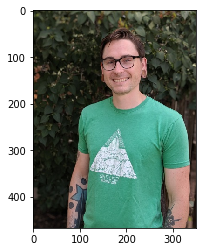

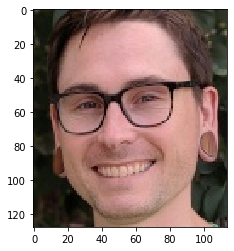

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = cv2.imread('Jeff.jpg',0)
img1 = mpimg.imread('Jeff.jpg',0)
img2 = img.copy()
template = cv2.imread('Jeff-template.jpg',0)
template1 = mpimg.imread('Jeff-template.jpg',0)
w, h = template.shape[::-1]

plt.imshow(img1)
plt.show()
plt.imshow(template1)
plt.show()

<h2>Mapping and Method</h2>
<p>The content of the template image is important as this is the box that is used to match against the source  image and the width and height of the template are used as the "region" to be searched for in the source image. The more detailed and precise the template, the more specific the search will be.<br/>
In this example, we use 6 diffrerent methods to compare the images.<br/><br/>
The template match in these 6 methods either use the largest Correlation Coefficient or the minimum squared difference:<br/>
# All the 6 methods for comparison in a list<br/>
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
</p>


<h2>Implementation</h2>
<p>The cv2 read-in souce image and template are stored in "res" using the matchTemplate method. res is then used to find the min and max locations for matching using the minMaxLoc method. The rectangle method for cv2 finally creates the region used for matching the template to the source using the gathered data as its parameters. This also allows for a box to show on the source image output where the match, if any, was found.</p>

<h2>Return</h2>
    <p>The imgaes are converted to grayscale and the template is matched against every part of the source image. With CCORR(correlation) CCOEFF (correlation coefficient) the beightest parts of the result are to be the best match, and with the SQDIFF(squared difference) the darkest parts of the result are to be the best match. However, the match does not always prove to be correct, as the matching is a representation of the matched pixel count and not the actual contours of the image. In this example TM_CORR does not quite get it right as it matches my face to the logo on my shirt.</p>

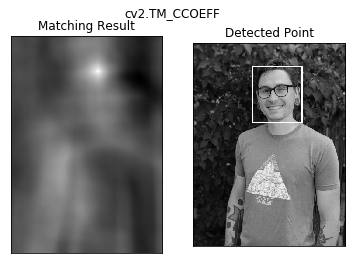

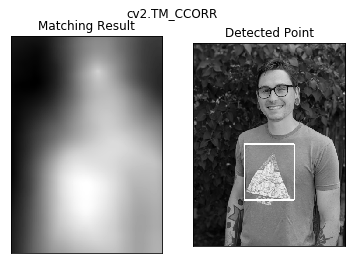

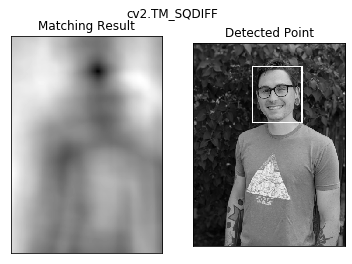

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#read in images
img = cv2.imread('Jeff.jpg',0)
img1 = mpimg.imread('Jeff.jpg',0)
img2 = img.copy()
template = cv2.imread('Jeff-template.jpg',0)
template1 = mpimg.imread('Jeff-template.jpg',0)

#width and height of the template are stored for reference size detection
w, h = template.shape[::-1]

#use only 3 methods for comparison
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCORR', 'cv2.TM_SQDIFF']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Create mapping region
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    # Map and Output results
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

<h2>All Together Now!</h2>

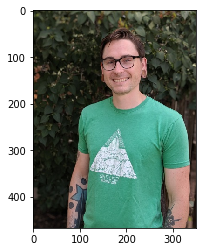

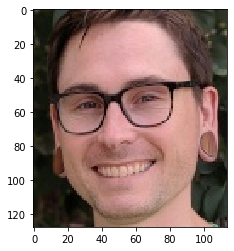

(128, 114)
w:  114 h:  128


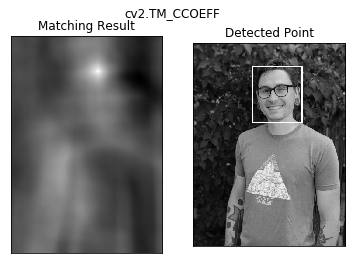

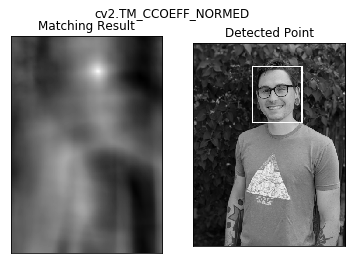

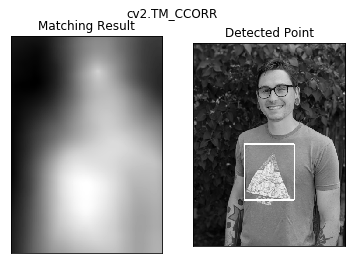

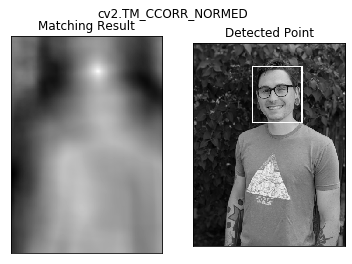

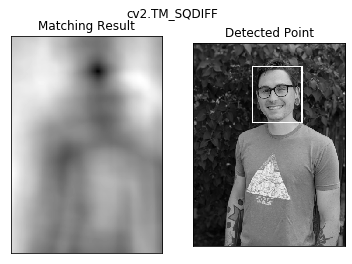

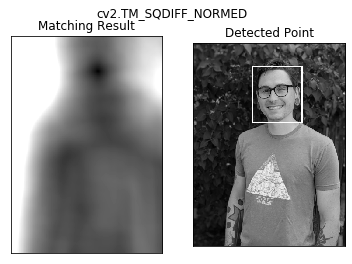

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#read in images
img = cv2.imread('Jeff.jpg',0)
img1 = mpimg.imread('Jeff.jpg',0)
img2 = img.copy()
template = cv2.imread('Jeff-template.jpg',0)
template1 = mpimg.imread('Jeff-template.jpg',0)

#width and height of the template are stored for reference size detection
w, h = template.shape[::-1]

#output original images
plt.imshow(img1)
plt.show()
plt.imshow(template1)
plt.show()

print(template.shape)
print('w: ', w, 'h: ', h)

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Create mapping region
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    # Map and Output results
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    plt.show()